b'num_cases_per_batch'
b'label_names'
b'num_vis'
b'horse'


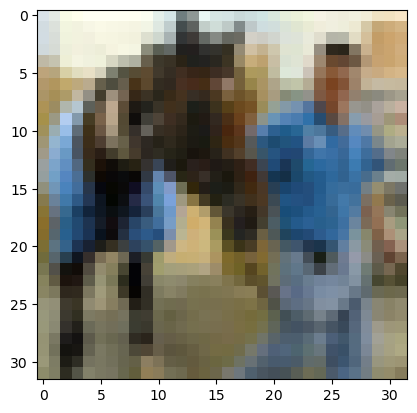

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
def unpickle(file):
	with open(file, 'rb') as fo:
		dict = pickle.load(fo, encoding='bytes')
	return dict
batch_1 = unpickle("./data_batch_1")
batch_2 = unpickle("./data_batch_2")
batch_3 = unpickle("./data_batch_3")
batch_4 = unpickle("./data_batch_4")
batch_5 = unpickle("./data_batch_5")
tb = unpickle("./test_batch")
my_dict = unpickle("./batches.meta")
labels_names = my_dict[b"label_names"]
# print(labels_names)
for key, value in my_dict.items() :
    print (key)

training_set = batch_1[b"data"]
random_int = np.random.randint(0,10000)
image_array = training_set[random_int]
image_R = np.reshape(image_array[0:1024], (32,32))
image_G = np.reshape(image_array[1024:2048], (32,32))
image_B = np.reshape(image_array[2048:4096], (32,32))
image = np.dstack((image_R, image_G, image_B))

label = batch_1[b'labels'][random_int]
label_name = labels_names[label]

print(label_name)
plt.imshow(image)
plt.show()

In [6]:
def transpose_dataframe_clear(df):
	dataset =  df.drop(["label"], axis=1).T.iloc[0:1024].T
	labels = pd.DataFrame([df['label']]).T
	df = pd.concat([dataset, labels], axis=1)
	return df

In [12]:
df = pd.DataFrame(batch_1[b"data"])
df["label"] = batch_1[b"labels"]
df = transpose_dataframe_clear(df)
df.to_csv("data_batch_1_grayscale.csv", index=False)
df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,59,43,50,68,98,119,139,145,149,149,...,119,130,120,92,103,170,216,151,123,6
1,154,126,105,102,125,155,172,180,142,111,...,51,68,90,116,134,140,143,143,143,9
2,255,253,253,253,253,253,253,253,253,253,...,69,66,55,52,58,68,78,79,80,9
3,28,37,38,42,44,40,40,24,32,43,...,80,96,77,85,84,67,54,63,72,4
4,170,168,177,183,181,177,181,184,189,189,...,77,75,71,74,72,71,75,71,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18,18,21,23,24,23,24,25,22,19,...,48,53,57,62,60,59,59,59,58,3
9996,235,240,249,253,254,253,254,254,179,108,...,88,119,149,174,189,195,194,193,193,9
9997,71,60,74,73,87,125,179,231,250,252,...,73,76,80,77,88,89,80,83,84,1
9998,250,254,211,64,61,60,55,54,55,59,...,129,127,126,124,128,129,214,255,255,1
